##讀取資料

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas.core.indexes.extension import deprecate_ndim_indexing

!pip install yfinance

msft = yf.Ticker("AAPL")

# get stock info
msft.info

# get historical market data(取得歷史資料)
hist = msft.history(period="1y") #1y = 1 year
hist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-29 00:00:00-05:00,158.450394,160.259899,157.873739,159.315384,88748200,0.0,0
2021-11-30 00:00:00-05:00,159.066819,164.564908,158.997215,164.346176,174048100,0.0,0
2021-12-01 00:00:00-05:00,166.513583,169.317318,163.580609,163.819229,152052500,0.0,0
2021-12-02 00:00:00-05:00,157.824041,163.252527,156.889462,162.815063,136739200,0.0,0
2021-12-03 00:00:00-05:00,163.073557,164.008135,158.798366,160.906128,118023100,0.0,0
...,...,...,...,...,...,...,...
2022-11-21 00:00:00-05:00,150.160004,150.369995,147.720001,148.009995,58724100,0.0,0
2022-11-22 00:00:00-05:00,148.130005,150.419998,146.929993,150.179993,51804100,0.0,0
2022-11-23 00:00:00-05:00,149.449997,151.830002,149.339996,151.070007,58301400,0.0,0


In [15]:
hist['Date'] = hist.index #將index 移到 Columns
data = hist[["Close", "Volume", "Date"]] #收盤價格， 交易量， 交易日期

In [16]:
dat = list(hist[["Date"]].iloc[:, 0]) # 交易日期
close = list(hist[["Close"]].iloc[:, 0]) # 收盤價格
volume = list(hist[["Volume"]].iloc[:, 0]) # 成交量

In [17]:
# 設定 V0=平均值
V0 = hist["Volume"].mean() 

In [18]:
data.shape

(252, 3)

# 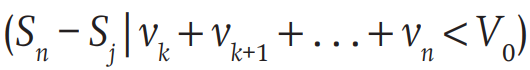

In [19]:
# Vk+(Vk+1)+...+Vn
data["Volume"].sum() 

22901982600

In [20]:
## Vk+(Vk+1)+...+Vn

print(data.iloc[0, 1])  #第一筆""Volume"
print(data.iloc[-1, 1])  #最後一筆"Volume"
print(data.iloc[data.shape[0]-1, 1])  #data.shape[0]-1 = (252-1) , 1 = 第一列(總共有0、1列)
s_sum = 0
for i in range(0, data.shape[0]):
  s_sum = s_sum + data.iloc[i, 1]
print(s_sum)

88748200
69246000
69246000
22901982600


In [21]:
# for j in range(0, data.shape[0]):
#   print( int(data.iloc[j, 0]), int(data.iloc[j, 1]))
# if(s_sum < V0):
print(data.iloc[251, 0]- data.iloc[0, 0]) #最後一筆-第一筆

-15.095382690429688


#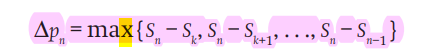

In [22]:
s_diff = []
s_date = []

for n in range(0, data.shape[0]):

  v_sum=0

  for j in range(n, 0, -1):
    
    v_sum=0

    if (v_sum < V0):
      v_sum = v_sum + data.iloc[j, 1]
      s_diff.append(data['Close'].iloc[n] - data['Close'].iloc[j])
      s_date.append([(dat[(close.index(max(close)))]), (dat[(close.index(min(close)))])])

    else:
      v_sum = 0
      break
print(max(s_diff))
print(s_date[0])

44.596435546875
[Timestamp('2022-01-03 00:00:00-0500', tz='America/New_York'), Timestamp('2022-06-16 00:00:00-0400', tz='America/New_York')]


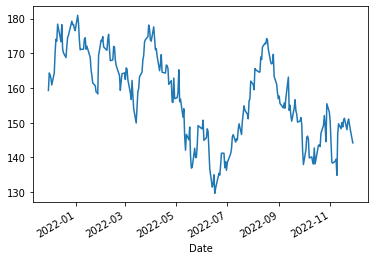

In [23]:
data['Close'].plot()

In [24]:
print(data['Close'].max()) #最高收盤價
print(data['Close'].min()) #最低收盤價
print((data['Close'].max())-(data['Close'].min())) #最大價差

180.95973205566406
129.66448974609375
51.29524230957031
